## Universal Sentence Encoder

Jay Urbain, PhD

Multilingual  pretrained sentence  encoding  modelsbased on the Transformer and CNN  model  architectures.   The  models  embed text from 16 languages into a single semantic space using a multi-task trained dual-encoder that learns tied representations using translation based bridge tasks (Chidambaramet  al.,  2018).

The  models  provide  performance  that  is  competitive  with  the  state-of-the-art on: semantic retrieval (SR), translation pair bitext retrieval (BR) and retrieval question answering (ReQA). 

On English transfer learning tasks,  the sentence-level embeddings approach, matches and in some cases exceed, the performance of monolingual, English only, sentence embedding  models.

Designed for tasks using pretraining and transfer learning for applications with limited training data.

The  models are available for download on TensorFlow Hub.

#### References:  

Universal Sentence Encoder   
- https://arxiv.org/pdf/1803.11175.pdf (paper)

- https://tfhub.dev/google/universal-sentence-encoder/4 (model)
- https://github.com/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb (Tensorflow Hub model repo)
- https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb (colab)
- https://towardsdatascience.com/use-cases-of-googles-universal-sentence-encoder-in-production-dd5aaab4fc15 (blog post)   
    
Deep Unordered Composition Rivals Syntactic Methods for Text Classification
- https://people.cs.umass.edu/~miyyer/pubs/2015_acl_dan.pdf (Encoder model used in Universal Sentence Encoder, much better computationally, as small cost in performance relative to transformer modeel).

Sentence-level transfer learning paper outperforming word models: 
- Alexis Conneau, Douwe Kiela, Holger Schwenk, LoicBarrault,  and  Antoine  Bordes.  2017.    Supervised learning of universal sentence representations from natural  language  inference  data. arXiv preprintarXiv:1705.02364.   
https://arxiv.org/pdf/1803.11175.pdf#cite.conneau2017

The `Universal Sentence Encoder` encodes text into high dimensional vectors that can be used for text classification, semantic similarity, clustering, and other natural language tasks. 

The pre-trained Universal Sentence Encoder is publicly available in Tensorflow-hub. It comes with two variations i.e. one trained with `Transformer encoder` and other trained with `Deep Averaging Network (DAN)`. The two have a trade-off of accuracy and computational resource requirement. While the one with Transformer encoder has higher accuracy, it is computationally more intensive. The one with DNA encoding is computationally less expensive and with little lower accuracy.

This notebook illustrates how to access the Universal Sentence Encoder and use it for sentence similarity and sentence classification tasks.

The sentence embeddings can then be easily used to compute sentence level meaning similarity as well as to enable better performance on downstream classification tasks using less supervised training data.


This section sets up the environment for access to the Universal Sentence Encoder on TF Hub and provides examples of applying the encoder to words, sentences, and paragraphs.

The DAN enocding is used. DAN has been documented to take very less training time with slightly less accuracy on compared to other approach i.e. transformer encoder.

https://medium.com/tech-that-works/deep-averaging-network-in-universal-sentence-encoder-465655874a04


In [10]:
%%capture
# Install the latest Tensorflow version.
#!pip3 install --upgrade tensorflow-gpu
# Install TF-Hub.
# !pip3 install tensorflow-hub
# !pip3 install seaborn

#### Load the Universal Sentence Encoder's TF Hub module

In [11]:
from absl import logging

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


#### Compute a representation for each message, showing various lengths supported

In [13]:
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output.
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:3]))
  print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: Elephant
Embedding size: 512
Embedding: [0.008344483561813831, 0.0004808558733202517, 0.06595248728990555, ...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.050808604806661606, -0.0165242962539196, 0.01573782227933407, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [-0.02833268791437149, -0.055862173438072205, -0.012941430322825909, ...]



Potentially more challenging questions testing similar words with different meaning, and disimilar words with similar meaning

In [15]:
#title Compute a representation for each message, showing various lengths supported.
q1 = "Where do you live?"
q2 = "What is your address?"
q3 = "What is your name?"
q4 = "Where is your home?"
messages = [q1, q2, q3, q4]

# Reduce logging output.
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:3]))
  print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: Where do you live?
Embedding size: 512
Embedding: [-0.051802027970552444, 0.00988512858748436, 0.009856321848928928, ...]

Message: What is your address?
Embedding size: 512
Embedding: [0.013197696767747402, -0.07083427160978317, -0.060961704701185226, ...]

Message: What is your name?
Embedding size: 512
Embedding: [-0.08571171760559082, -0.0494118370115757, -0.019511744379997253, ...]

Message: Where is your home?
Embedding size: 512
Embedding: [-0.05422673001885414, 0.012377091683447361, -0.018855107948184013, ...]



In [7]:
print(messages)
m1 = 1
m2 = 2
print(messages[m1], messages[m2], np.inner(message_embeddings[m1], message_embeddings[m2]))


['Where do you live?', 'What is your address?', 'What is your name?', 'Where is your home?']
What is your address? What is your name? 0.49952847


In [8]:
for i in range( len(messages) ):
  for j in range( len(messages) ):
    if i != j:
      print(messages[i], messages[j], np.inner(message_embeddings[i], message_embeddings[j]))

Where do you live? What is your address? 0.47146526
Where do you live? What is your name? 0.40523222
Where do you live? Where is your home? 0.72636557
What is your address? Where do you live? 0.47146526
What is your address? What is your name? 0.49952847
What is your address? Where is your home? 0.56147164
What is your name? Where do you live? 0.40523222
What is your name? What is your address? 0.49952847
What is your name? Where is your home? 0.3848793
Where is your home? Where do you live? 0.72636557
Where is your home? What is your address? 0.56147164
Where is your home? What is your name? 0.3848793


In [9]:
enumerate(np.array(message_embeddings))

# Semantic Textual Similarity Task Example

The embeddings produced by the Universal Sentence Encoder are approximately normalized. The semantic similarity of two sentences can be trivially computed as the inner product of the encodings.

In [16]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

## Similarity Visualized
Here we show the similarity in a heat map. The final graph is a 9x9 matrix where each entry `[i, j]` is colored based on the inner product of the encodings for sentence `i` and `j`.

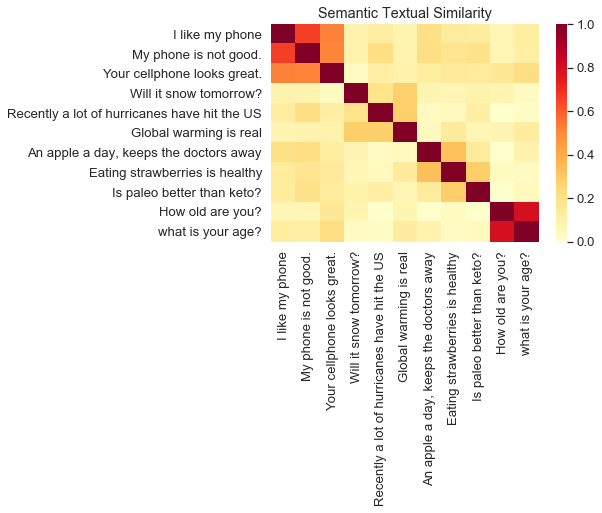

In [17]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

run_and_plot(messages)
               

## Evaluation: STS (Semantic Textual Similarity) Benchmark

The [**STS Benchmark**](http://ixa2.si.ehu.es/stswiki/index.php/STSbenchmark) provides an intristic evaluation of the degree to which similarity scores computed using sentence embeddings align with human judgements. The benchmark requires systems to return similarity scores for a diverse selection of sentence pairs. [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is then used to evaluate the quality of the machine similarity scores against human judgements.

### Download data

In [9]:
import pandas
import scipy
import math
import csv

sts_dataset = tf.keras.utils.get_file(
    fname="Stsbenchmark.tar.gz",
    origin="http://ixa2.si.ehu.es/stswiki/images/4/48/Stsbenchmark.tar.gz",
    extract=True)
sts_dev = pandas.read_table(
    os.path.join(os.path.dirname(sts_dataset), "stsbenchmark", "sts-dev.csv"),
    error_bad_lines=False,
    skip_blank_lines=True,
    usecols=[4, 5, 6],
    names=["sim", "sent_1", "sent_2"])
sts_test = pandas.read_table(
    os.path.join(
        os.path.dirname(sts_dataset), "stsbenchmark", "sts-test.csv"),
    error_bad_lines=False,
    quoting=csv.QUOTE_NONE,
    skip_blank_lines=True,
    usecols=[4, 5, 6],
    names=["sim", "sent_1", "sent_2"])
# cleanup some NaN values in sts_dev
sts_dev = sts_dev[[isinstance(s, str) for s in sts_dev['sent_2']]]

417792/409630 [==============================] - 1s 1us/step


### Evaluate Sentence Embeddings

In [10]:
sts_data = sts_dev #@param ["sts_dev", "sts_test"] {type:"raw"}

def run_sts_benchmark(batch):
  sts_encode1 = tf.nn.l2_normalize(embed(tf.constant(batch['sent_1'].tolist())), axis=1)
  sts_encode2 = tf.nn.l2_normalize(embed(tf.constant(batch['sent_2'].tolist())), axis=1)
  cosine_similarities = tf.reduce_sum(tf.multiply(sts_encode1, sts_encode2), axis=1)
  clip_cosine_similarities = tf.clip_by_value(cosine_similarities, -1.0, 1.0)
  scores = 1.0 - tf.acos(clip_cosine_similarities)
  """Returns the similarity scores"""
  return scores

dev_scores = sts_data['sim'].tolist()
scores = []
for batch in np.array_split(sts_data, 10):
  scores.extend(run_sts_benchmark(batch))

pearson_correlation = scipy.stats.pearsonr(scores, dev_scores)
print('Pearson correlation coefficient = {0}\np-value = {1}'.format(
    pearson_correlation[0], pearson_correlation[1]))

Pearson correlation coefficient = 0.803640222976923
p-value = 0.0
